In [134]:
import pandas as pd
from plotnine import *
import plotnine as p9
import numpy as np

In [135]:
expe_dt = [336,386,408,481,506,646]
expe_dt = [x/24. for x in expe_dt]
expe_diam = [ 1140 , 1400 , 1590 , 2040 , 2250 , 3040 ]

In [136]:
biodynamo_dt = [14, 14.8333333333333, 15.6666666666667, 16.5, 17.3333333333333, 18.1666666666666, 18.9999999999999, 19.8333333333332, 20.6666666666665, 21.4999999999998, 22.333333333333, 23.1666666666663, 23.9999999999996, 24.8333333333329, 25.6666666666665, 26.5]
biodynamo_diam =  [1240, 1320, 1440, 1560, 1680, 1800, 1920, 2040, 2160, 2280, 2400, 2520, 2640, 2760, 2880, 3000]

In [137]:
df_tsim_pre = pd.read_csv('../Tisim/use_case_2Ddisk/results/result_2d_10_8_3.9_50.txt',sep='\t',engine='python')
df_tsim_pre


,time [d],Time [s],numCells (population 0),numCells (all),Radius of Gyration [μm],Radius of cell population [μm],min Cell cycle time [s],max Cell cycle time [s],mean Cell cycle time [s],min Absolute force (population 0) [nN],max Absolute force (population 0) [nN],mean Absolute force (population 0) [nN],Unnamed: 12
0,0.0,0.0,1,1,0.00,0.00,73246.4,73246.4,73246.4,0.00000,0.00,0.00,NaN
1,0.1,8648.0,1,1,0.00,0.00,73246.4,73246.4,73246.4,0.00000,0.00,0.00,NaN
2,0.2,17288.0,1,1,0.00,0.00,73246.4,73246.4,73246.4,0.00000,0.00,0.00,NaN
3,0.3,25928.0,1,1,0.00,0.00,73246.4,73246.4,73246.4,0.00000,0.00,0.00,NaN
4,0.4,34568.0,1,1,0.00,0.00,73246.4,73246.4,73246.4,0.00000,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,25.5,2203200.0,142887,142887,1017.68,1439.22,34451.5,90942.6,63059.0,15.18030,2063.96,1020.96,NaN
256,25.6,2211840.0,144427,144427,1023.12,1446.91,34451.5,90942.6,63054.2,32.69070,2122.76,1021.23,NaN
257,25.7,2220480.0,145974,145974,1028.56,1454.60,35108.0,90942.6,63050.5,16.25990,2130.06,1021.69,NaN
258,25.8,2229120.0,147588,147588,1034.17,1462.54,35108.0,90942.6,63052.7,26.32780,2116.23,1022.19,NaN


In [138]:
tisim_diam = [2*x for x in df_tsim_pre["Radius of cell population [μm]"].iloc[140:]]
tisim_dt = [x/86400 for x in df_tsim_pre['Time [s]'].iloc[140:]]

In [139]:
with open("../Chaste/use_case_2Ddisk/results/multiple-cells/tissuewidth.dat") as results_file:
    times = []
    tissue_widths = []
    for line in results_file:
        line = line.replace('\n', '')
        values = re.split('\t|,', line)
        if len(values) == 1:
            continue
        
        times.append(float(values[0]))
        tissue_widths.append(float(values[3]))
df_chaste = pd.DataFrame(data = zip(times,tissue_widths),columns=['dt','diam'])
df_chaste["dt"]=(df_chaste["dt"]+336)/24
df_chaste


,dt,diam
0,14.000000,1130.00
1,14.020833,1139.84
2,14.041667,1145.22
3,14.062500,1149.32
4,14.083333,1152.75
...,...,...
336,21.000000,2062.29
337,21.020833,2064.07
338,21.041667,2065.52
339,21.062500,2066.99


In [140]:
df_pc = pd.read_csv('../Physicell/output/physicell1428.csv' ,sep=',',engine='python')
df_pc = df_pc.drop(columns=df_pc.columns[0])
df_pc

,dt,diam
0,14.000000,1188.974294
1,14.041667,1197.277341
2,14.083333,1203.721348
3,14.125000,1210.057165
4,14.166667,1218.263506
...,...,...
332,27.833333,3264.343394
333,27.875000,3272.400022
334,27.916667,3279.856214
335,27.958333,3285.913148


In [141]:
df_exp = pd.DataFrame(data=zip(expe_dt,expe_diam),columns=['dt','diam'])
df_exp.insert(loc=2, column='Results', value='Experimental')
df_biod = pd.DataFrame(data=zip(biodynamo_dt,biodynamo_diam),columns=['dt','diam'])
df_biod.insert(loc=2, column='Results', value='BioDynaMo')
df_tisim = pd.DataFrame(data=zip(tisim_dt,tisim_diam),columns=['dt','diam'])
df_tisim.insert(loc=2, column='Results', value='TiSim')
df_pc.insert(loc=2, column='Results', value='PhysiCell')
df_chaste.insert(loc=2,column='Results',value="Chaste")

In [142]:
frames = [df_pc, df_tisim, df_biod, df_exp,df_chaste]
df_all = pd.concat(frames)

color = {
    'Experimental': 'black', 
    'BioDynaMo': 'red', 
    'TiSim': 'orange',
    'PhysiCell': 'green',
    'Chaste': 'blue'
    }

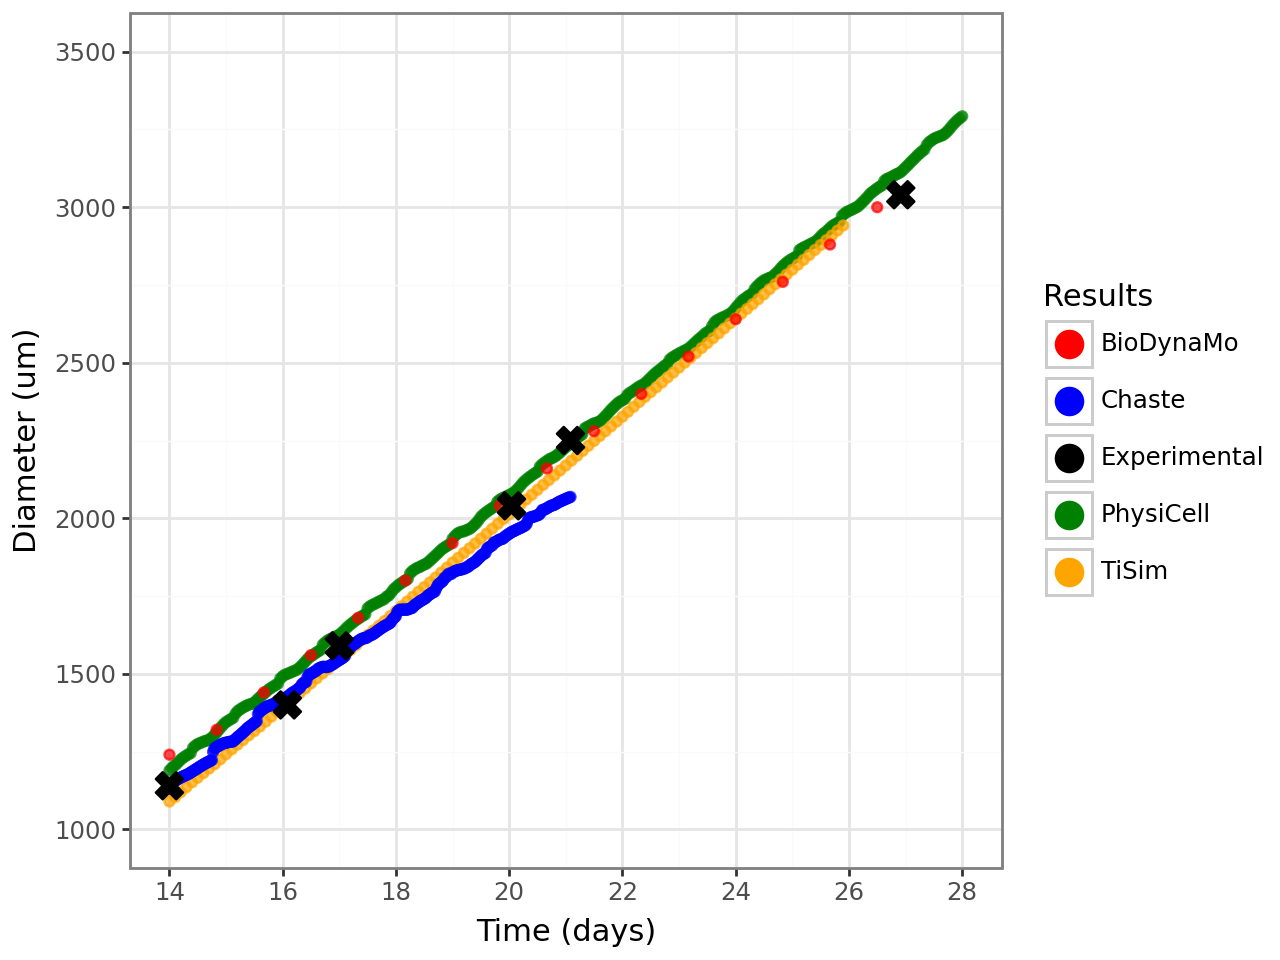

In [143]:
(
    ggplot (df_all) + 
    aes(x='dt',y='diam', colour='Results') + 
    geom_point(alpha = 0.7) +
    geom_point(data=df_all.query("Results == 'Experimental' "), shape="X", size=5)+
    scale_color_manual(values=color, name="Results")+
    scale_x_continuous(name="Time (days)", limits={14, 28}, breaks = range(14,30,2))+
    scale_y_continuous(name="Diameter (um)", limits={1000, 3500}, breaks = range(0,4000,500))+
    theme_bw()+
    theme(legend_position = "right")+
    guides(colour=guide_legend(override_aes={"shape": 'o'}))
)

In [144]:
monolayer = ggplot (df_all) + \
aes(x='dt',y='diam', colour='Results') + \
geom_point(alpha = 0.7) + \
geom_point(data=df_all.query("Results == 'Experimental' "), shape="X", size=5)+ \
scale_color_manual(values=color, name="Results")+\
scale_x_continuous(name="Time (days)", limits={14, 28}, breaks = range(14,30,2))+\
scale_y_continuous(name="Diameter (um)", limits={1000, 3500}, breaks = range(0,4000,500))+\
theme_bw()+\
theme(legend_position = "right")+\
guides(colour=guide_legend(override_aes={"shape": 'o'}))

monolayer.save(filename = 'monolayer.png', height=5, width=9, units = 'in', dpi=1000)

/home/amontagud2/anaconda3/envs/studio/lib/python3.13/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 9 x 5 in image.
/home/amontagud2/anaconda3/envs/studio/lib/python3.13/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: monolayer.png


In [145]:
bdm_json = [
{
  "_typename" : "bdm::experimental::TimeSeries",
  "data_" : [
    {"$pair" : "pair<string,bdm::experimental::TimeSeries::Data>", "first" : "env_dims", "second" : {
    "_typename" : "bdm::experimental::TimeSeries::Data",
    "y_reducer_collector" : 0,
    "x_values" : [14, 14.8333333333333, 15.6666666666667, 16.5, 17.3333333333333, 18.1666666666666, 18.9999999999999, 19.8333333333332, 20.6666666666665, 21.4999999999998, 22.333333333333, 23.1666666666663, 23.9999999999996, 24.8333333333329, 25.6666666666665, 26.5],
    "y_values" : [1240, 1320, 1440, 1560, 1680, 1800, 1920, 2040, 2160, 2280, 2400, 2520, 2640, 2760, 2880, 3000],
    "y_error_low" : [],
    "y_error_high" : [], 
    "_blob" : [4509931920, 4509931840]
  }}, {"$pair" : "pair<string,bdm::experimental::TimeSeries::Data>", "first" : "total_cells", "second" : {
    "_typename" : "bdm::experimental::TimeSeries::Data",
    "y_reducer_collector" : 0,
    "x_values" : [14, 14.8333333333333, 15.6666666666667, 16.5, 17.3333333333333, 18.1666666666666, 18.9999999999999, 19.8333333333332, 20.6666666666665, 21.4999999999998, 22.333333333333, 23.1666666666663, 23.9999999999996, 24.8333333333329, 25.6666666666665, 26.5],
    "y_values" : [3249, 16717, 20519, 24468, 28648, 33086, 37802, 42797, 48095, 53681, 59501, 65624, 72062, 78778, 85765, 93064],
    "y_error_low" : [],
    "y_error_high" : [], 
    "_blob" : [4509931744, 4509931840]
  }}]
}
]

In [196]:
# cells vs time
# BioDynaMo

bdm_all = pd.json_normalize(
    data = bdm_json,
    record_path=['data_'],
    # record_path=['data_','second','y_values'],
    errors='ignore')

bdm_cells = bdm_all.loc[bdm_all['first'] == 'total_cells' , ['second.x_values', 'second.y_values']]
bdm_cells_x = bdm_cells.apply(lambda x: pd.Series(x['second.x_values']), axis=1)
bdm_cells_y = bdm_cells.apply(lambda x: pd.Series(x['second.y_values']), axis=1)
bdm_cells2 = pd.concat([bdm_cells_x, bdm_cells_y], axis=0).transpose()
# bdm_cells2 = pd.concat([bdm_cells2, df_biod], axis=1)
bdm_cells2.columns = ['dt','cells']
bdm_cells3 = bdm_cells2.merge(df_biod,on='dt', how='left')
bdm_cells3["cells^1/2"]=np.power(bdm_cells3["cells"],1/2)
bdm_cells3["diam/cells"]=bdm_cells3["diam"]/bdm_cells3["cells"]
bdm_cells3

,dt,cells,diam,Results,cells^1/2,diam/cells
0,14.000000,3249.0,1240,BioDynaMo,57.000000,0.381656
1,14.833333,16717.0,1320,BioDynaMo,129.294238,0.078962
2,15.666667,20519.0,1440,BioDynaMo,143.244546,0.070179
3,16.500000,24468.0,1560,BioDynaMo,156.422505,0.063757
4,17.333333,28648.0,1680,BioDynaMo,169.257201,0.058643
5,18.166667,33086.0,1800,BioDynaMo,181.895574,0.054404
6,19.000000,37802.0,1920,BioDynaMo,194.427364,0.050791
7,19.833333,42797.0,2040,BioDynaMo,206.874358,0.047667
8,20.666667,48095.0,2160,BioDynaMo,219.305723,0.044911
9,21.500000,53681.0,2280,BioDynaMo,231.691605,0.042473


In [197]:
# cells vs time
# TiSim
tisim_dt = [x/86400 for x in df_tsim_pre['Time [s]'].iloc[140:]]
tisim_cells = [x for x in df_tsim_pre["numCells (all)"].iloc[140:]]
df_tisim_cells = pd.DataFrame(data=zip(tisim_dt,tisim_cells),columns=['dt','cells'])
df_tisim_cells2 = df_tisim_cells.merge(df_tisim, on='dt', how='left')
df_tisim_cells2["cells^1/2"]=np.power(df_tisim_cells2["cells"],1/2)
df_tisim_cells2["diam/cells"]=df_tisim_cells2["diam"]/df_tisim_cells2["cells"]

df_tisim_cells2

# PhysiCell: not available
# df_pc = pd.read_csv('../Physicell/output/physicell1428.csv' ,sep=',',engine='python')
# df_pc = df_pc.drop(columns=df_pc.columns[0])
# df_pc = df_pc.rename(columns={"Time (s)": "dt"})
# df_pc["dt"] = df_pc["dt"]/86400
# df_pc["Results"] = "PhysiCell"
# df_pc


,dt,cells,diam,Results,cells^1/2,diam/cells
0,14.0,19514,1089.386,TiSim,139.692519,0.055826
1,14.1,20038,1103.568,TiSim,141.555643,0.055074
2,14.2,20659,1119.310,TiSim,143.732390,0.054180
3,14.3,21293,1135.278,TiSim,145.921212,0.053317
4,14.4,21897,1151.256,TiSim,147.976349,0.052576
...,...,...,...,...,...,...
115,25.5,142887,2878.440,TiSim,378.003968,0.020145
116,25.6,144427,2893.820,TiSim,380.035525,0.020037
117,25.7,145974,2909.200,TiSim,382.065439,0.019930
118,25.8,147588,2925.080,TiSim,384.171837,0.019819


In [198]:
# Chaste
with open("../Chaste/use_case_2Ddisk/results/multiple-cells/tissuewidth.dat") as results_file:
    times = []
    tissue_widths = []
    num_cells = []
    for line in results_file:
        line = line.replace('\n', '')
        values = re.split('\t|,', line)
        if len(values) == 1:
            continue
        
        times.append(float(values[0]))
        tissue_widths.append(float(values[3]))
        num_cells.append(int(values[4]))
        
df_chaste_cells = pd.DataFrame(data = zip(times,tissue_widths,num_cells),columns=['dt','cells','diam'])
df_chaste_cells["dt"]=(df_chaste_cells["dt"]+336)/24
df_chaste_cells["cells^1/2"]=np.power(df_chaste_cells["cells"],1/2)
df_chaste_cells["diam/cells"]=df_chaste_cells["diam"]/df_chaste_cells["cells"]
df_chaste_cells


,dt,cells,diam,cells^1/2,diam/cells
0,14.000000,1130.00,2929,33.615473,2.592035
1,14.020833,1139.84,2929,33.761517,2.569659
2,14.041667,1145.22,2929,33.841099,2.557587
3,14.062500,1149.32,2929,33.901622,2.548463
4,14.083333,1152.75,2929,33.952172,2.540881
...,...,...,...,...,...
336,21.000000,2062.29,7462,45.412443,3.618308
337,21.020833,2064.07,7485,45.432037,3.626331
338,21.041667,2065.52,7507,45.447992,3.634436
339,21.062500,2066.99,7530,45.464162,3.642978


In [186]:
# no exp, no PC

# bdm_cells2.insert(loc=2, column='Results', value='BioDynaMo')
# df_tisim_cells.insert(loc=2, column='Results', value='TiSim')
# df_pc.insert(loc=2, column='Results', value='PhysiCell')
df_chaste_cells.insert(loc=2,column='Results',value="Chaste")

In [192]:
frames = [df_tisim_cells2, bdm_cells3,df_chaste_cells]
df_all = pd.concat(frames)

color = {
    'Experimental': 'black', 
    'BioDynaMo': 'red', 
    'TiSim': 'orange',
    'PhysiCell': 'green',
    'Chaste': 'blue'
    }

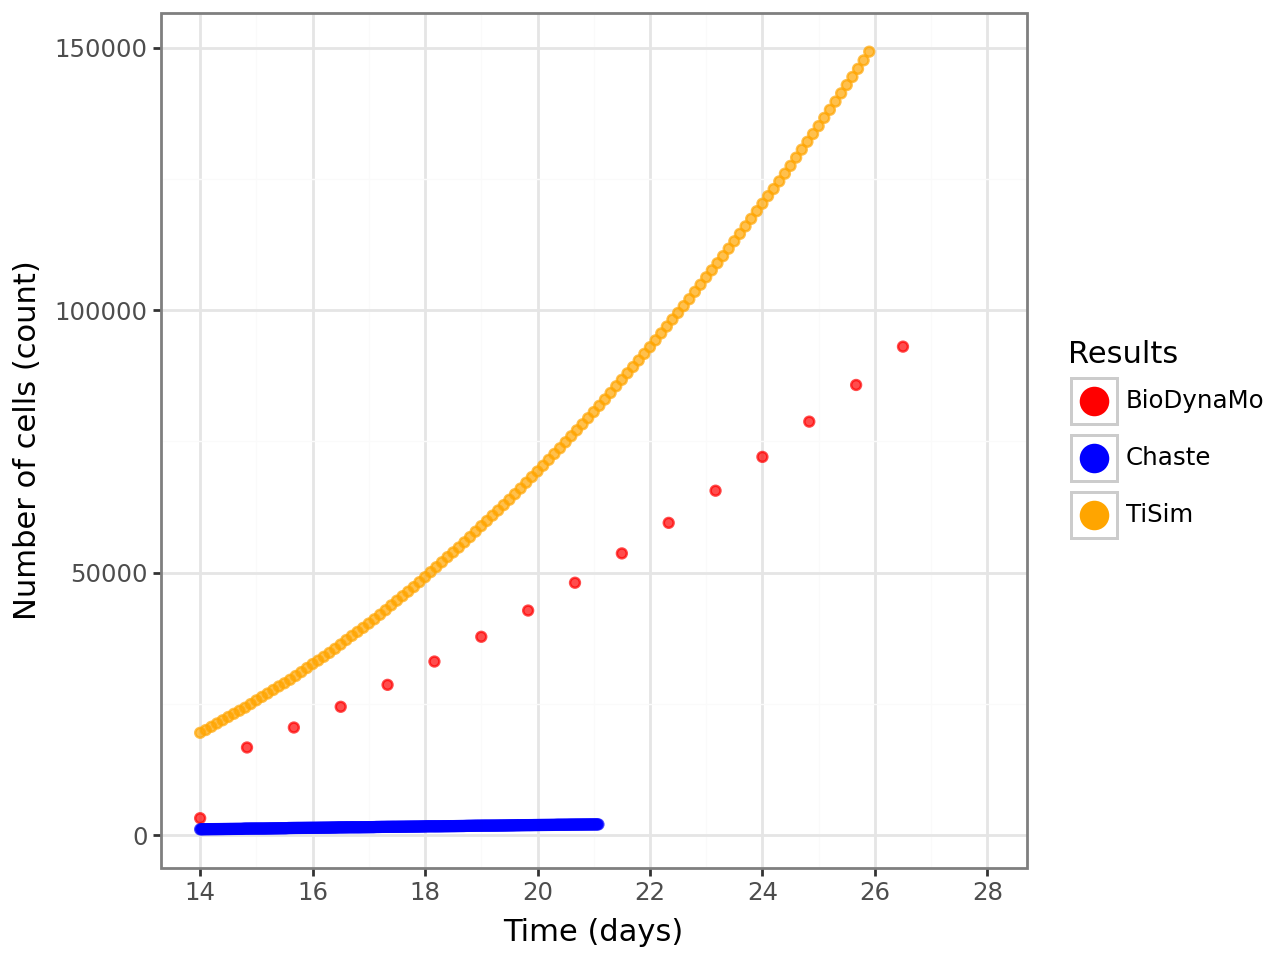

In [193]:
(
    ggplot (df_all) + 
    aes(x='dt',y='cells', colour='Results') + 
    geom_point(alpha = 0.7) +
    geom_point(data=df_all.query("Results == 'Experimental' "), shape="X", size=5)+
    scale_color_manual(values=color, name="Results")+
    scale_x_continuous(name="Time (days)", limits={14, 28}, breaks = range(14,30,2))+
    # scale_y_continuous(name="Number of cells (count)", limits={1000, 3500}, breaks = range(0,4000,500))+
    scale_y_continuous(name="Number of cells (count)")+
    theme_bw()+
    theme(legend_position = "right")+
    guides(colour=guide_legend(override_aes={"shape": 'o'}))
)

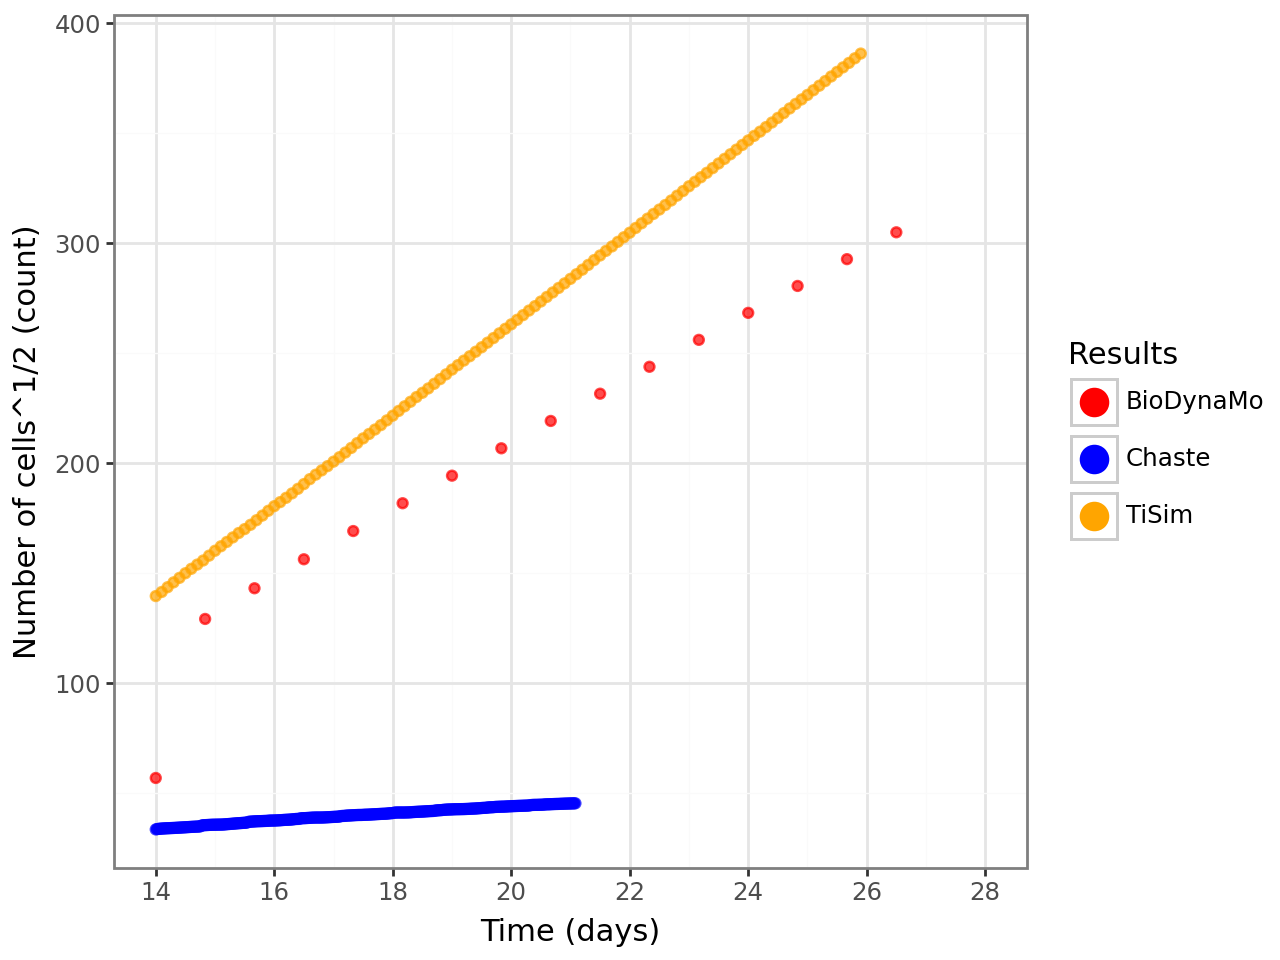

In [194]:
(
    ggplot (df_all) + 
    aes(x='dt',y='cells^1/2', colour='Results') + 
    geom_point(alpha = 0.7) +
    geom_point(data=df_all.query("Results == 'Experimental' "), shape="X", size=5)+
    scale_color_manual(values=color, name="Results")+
    scale_x_continuous(name="Time (days)", limits={14, 28}, breaks = range(14,30,2))+
    # scale_y_continuous(name="Number of cells (count)", limits={1000, 3500}, breaks = range(0,4000,500))+
    scale_y_continuous(name="Number of cells^1/2 (count)")+
    theme_bw()+
    theme(legend_position = "right")+
    guides(colour=guide_legend(override_aes={"shape": 'o'}))
)

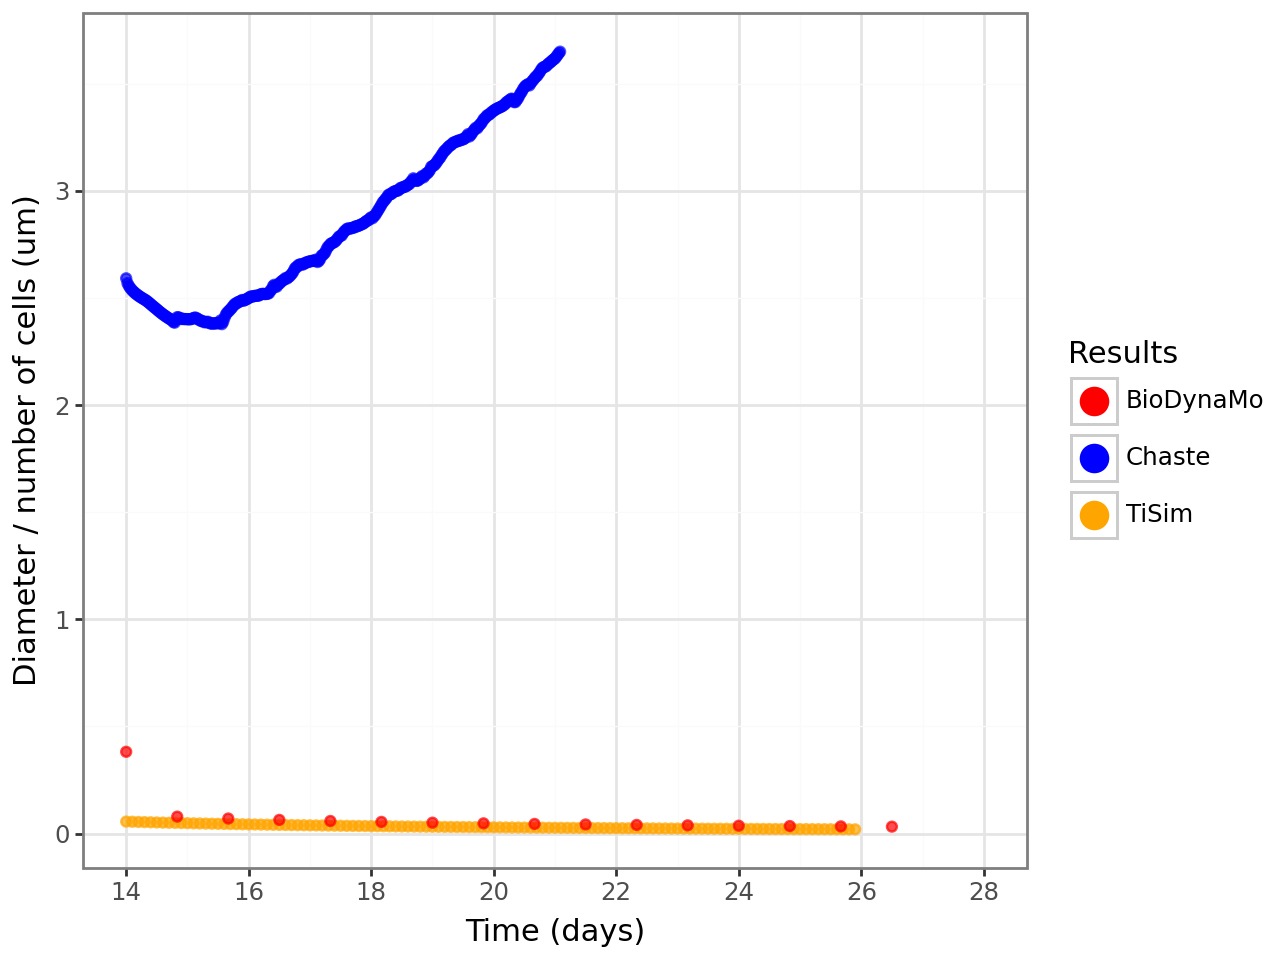

In [200]:
(
    ggplot (df_all) + 
    aes(x='dt',y='diam/cells', colour='Results') + 
    geom_point(alpha = 0.7) +
    geom_point(data=df_all.query("Results == 'Experimental' "), shape="X", size=5)+
    scale_color_manual(values=color, name="Results")+
    scale_x_continuous(name="Time (days)", limits={14, 28}, breaks = range(14,30,2))+
    # scale_y_continuous(name="Number of cells (count)", limits={1000, 3500}, breaks = range(0,4000,500))+
    scale_y_continuous(name="Diameter / number of cells (um)")+
    theme_bw()+
    theme(legend_position = "right")+
    guides(colour=guide_legend(override_aes={"shape": 'o'}))
)